#MSPA PREDICT 400

##Discussion Topic: Week 9 Normal Probability Distribution and the Curve

###Introduction

This document presents the results of the ninth weeks discussion topic for the Masters of Science in Predictive Analytics course: PREDICT 400. This assessment required the student to explain how the normal probability distribution related to the normal curve.

###Normal Probability Distribution and the Curve

According to <a href = "http://www.amazon.com/Finite-Mathematics-Calculus-Applications-9th/dp/0321749081/ref=sr_1_2?s=books&ie=UTF8&qid=1455578432&sr=1-2&keywords=lial+finite">Lial</a>, each normal probability distribution has associated with it a bell-shaped curve, called a normal curve. The below shows a normal probability distribution and its associated curve, across the range from -10 to 10.

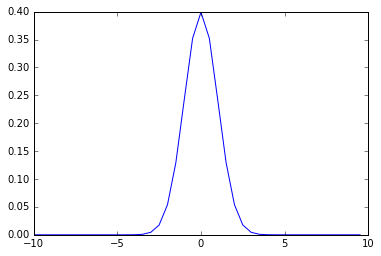

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

points = np.arange(-10, 10, 0.5)
probabilities = norm.pdf(points)
plt.plot(points, probabilities)
plt.show()

####Characteristics of the Normal Distribution

According to <a href = "http://www.intmath.com/counting-probability/14-normal-probability-distribution.php">Interactive Mathematics</a>, normal probability distributions have a number of properties:
1) The curve of the distribution is symmetrical about its mean value.
2) The mean is at the middle of the curve and divides its area into two halves.
3) The total area under the curve is equal to one.
4) It is completely determined by its mean and standard deviation values.

For all normal distributions the same percentage of observations are within one standard deviation of the mean, within two standard deviations of the mean, within three standard deviations of the mean and so on. Likewise, for any given normal distribution, approximately 68% of the data is within one standard deviation of the mean, about 95% is within two standard deviations of the mean, and about 99% is within three standard deviations of the mean.

Formula demonstrating this for a set of normal data is shown below.

In [2]:
normdata = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 
            43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 
            46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 
            48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]
   
mean = float(sum(normdata)) / len(normdata)
print("mean:", mean)

variances = [(i - mean) ** 2 for i in normdata]
variance = float(sum(variances)) / len(variances)
print("variance", variance)

standard_deviation = variance ** (float(1)/2)
standard_deviations = [float(i - mean) / standard_deviation for i in normdata]
print("standard_deviation:", standard_deviation)

mean: 45.5
variance 15.21
standard_deviation: 3.9


In [3]:
def within_percentage(deviations, count):
    within = [i for i in deviations if i <= count and i >= -count]
    count = len(within)
    return float(count) / len(deviations)

within_one_percentage = within_percentage(standard_deviations, 1)
print("within_one_percentage:", within_one_percentage)

within_two_percentage = within_percentage(standard_deviations, 2)
print("within_two_percentage:", within_two_percentage)

within_three_percentage = within_percentage(standard_deviations, 3)
print("within_three_percentage:", within_three_percentage)

within_one_percentage: 0.68
within_two_percentage: 0.96
within_three_percentage: 1.0


####Practical Application - Dice

We can use dice to demonstrate changes in probability distributions. Consider the example shown below. The plot presents probability outcomes for scenarios involving throwing one, two, three, four and five dice. When one dice is thrown, its probability distribution remains uniform over the range of dice values. When throwing two dice, the probability distribution becomes triangular with a mean of 6. As we further increase the amount of dice thrown, the probability distributions become normal, represented by normal curves. The greater the amount of dice thrown, the greater the mean (or expected) value, and greater its variance (or range).

In [4]:
#Source: https://github.com/AllenDowney/PythonCounterPmf
from collections import Counter

class Pmf(Counter):
    def normalize(self):
        total = float(sum(self.values()))
        for key in self:
            self[key] /= total

    def __add__(self, other):
        pmf = Pmf()
        for key1, prob1 in self.items():
            for key2, prob2 in other.items():
                pmf[key1 + key2] += prob1 * prob2
        return pmf

    def __hash__(self):
        return id(self)
    
    def __eq__(self, other):
        return self is other

    def render(self):
        return zip(*sorted(self.items()))

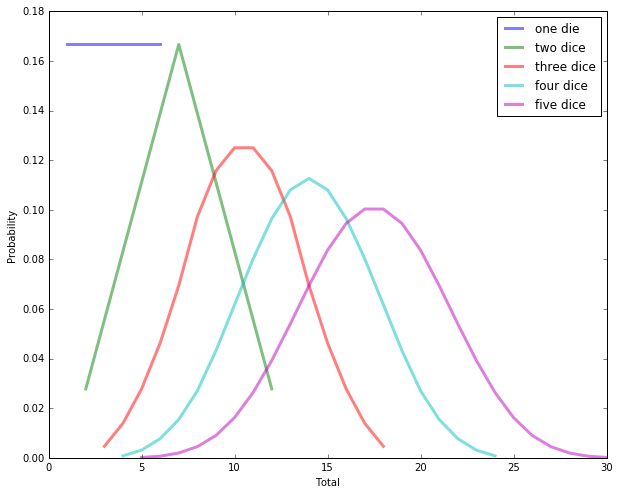

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

d6 = Pmf([1,2,3,4,5,6])
pmf_ident = Pmf([0])

d6.normalize()
d6.name = 'one die'

d6_two = d6 + d6
d6_two.name = 'two dice'

d6_three = sum([d6]*3, pmf_ident)
d6_three.name = 'three dice'

d6_four = sum([d6]*4, pmf_ident)
d6_four.name = 'four dice'

d6_five = sum([d6]*5, pmf_ident)
d6_five.name = 'five dice'

plt.figure(figsize=(10,8))

for die in [d6, d6_two, d6_three, d6_four, d6_five]:
    xs, ys = die.render()
    plt.plot(xs, ys, label=die.name, linewidth=3, alpha=0.5)
    
plt.xlabel('Total')
plt.ylabel('Probability')
plt.legend()
plt.show()